# Aprendizagem Automática Avançada
## TP3
João Romão - 55760,
Pedro França - 55848

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, datasets
import pandas as pd
from sklearn.model_selection import cross_val_score

# 1 Iris dataset demonstration

## 1.1 Running the examples for the Iris dataset

In this first exercise, as indicated in the exercise question, we simply copied and pasted the code of the [website](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/) and ran it so we could analyse the results and present our conclusions.

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

We converted the given code needed to plot the graph to a function (graphPlot) so we could reuse it on the next exercises. Additionally, we created a second function (crossval) to calculate the score for each model, derived by 10-fold cross-validation.

In [3]:
def graphPlot(svc, title):
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

In [4]:
def crossval(svc, X, y):
    scores = cross_val_score(svc, X, y, cv=10, )
    meanScore= sum(scores)/len(scores)
    print("10-fold cv score: ", round(meanScore,3))

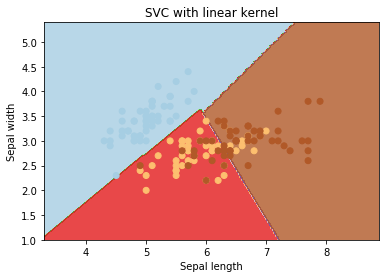

10-fold cv score:  0.813


In [5]:
graphPlot(svc, "SVC with linear kernel")
crossval(svc, X, y)

Observing the linear kernel with all default parameters, it is possible to see the 3 different classes being separated by their rectilinear borders (decision boundaries of the linear kernel). Each dot inside of each border has the same attributed classification and it is curious to observe that the blue dots are very well classified, as there is no overlapping with the other classes. For the two other classes the results are not as good, due to the mix that can be observed between the training data.

## 1.2 Comparing the different hyperparameters using "rbf" kernel

The Radial Basis Function (RBF) kernel is one of the most widely used kernels and is similar to the Gaussian distribution. This kernel function calculates the similarity (or proximity) of two points, x<sub>1</sub> and x<sub>2</sub>, according to the function:
<p>
</p>

<center> <b>RBF(x<sub>1</sub>, x<sub>2</sub>) = <i>exp</i>(-γ ||x<sub>1</sub>-x<sub>2</sub>||<sup>2</sup>) </b></center>

This kernel finds suppor vector classifiers in an infinite dimensional space. In general terms, this process behaves similarly to weighted nearest neighbor model when classifiying a new observation, with data that is closer to it having a higher influence in its classification, while data that are more distant having relatively lower influence.

### 1.2.1 Gamma analysis

In RBF, gamma is the parameter that controls the width of the Gaussian Kernel, therefore defining how much influence each training example has on the model. In practical terms, as explained in the [documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html), low values of gamma define a wide region of influence of each training point, while high values define a small region of influece. This means that for high values of gamma the testing points need to be very close to a training datapoint to be considered as part of the same assigned class. Therefore, high levels of gamma lead to a high bias of the model in relation to the training data, causing overfitting. We can observe this by inspecting the plots presented on the website, which we will replicate in the next subsections.

### 1.2.1.1 Gamma = 0

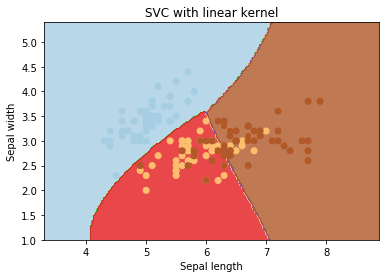

10-fold cv score:  0.82


In [6]:
svc_G0 = svm.SVC(kernel='rbf', gamma = 0.4).fit(X, y)
graphPlot(svc_G0, "SVC with linear kernel")
crossval(svc_G0, X, y)

If we define 0 as the value for gamma, the editor displays an error message saying that it is not possible to compute the model. We decided to increase this number to 0.4 in order to observe an identical graph to the one on website for the "gamma=0" scenario. The graph shows the curved decision boundaries of each group due to the use of the "rbf" kernel. This gamma value keeps the integrity of the model, does not cause overfitting, and results in a good cross-valitation score, especially considering the significant overlap between the yellow and brown dots.

### 1.2.1.2 Gamma = 10

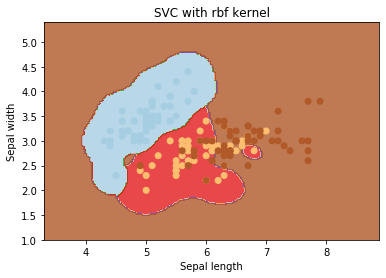

10-fold cv score:  0.78


In [7]:
svc_G10 = svm.SVC(kernel='rbf', gamma=10, C=1).fit(X, y)
graphPlot(svc_G10, "SVC with rbf kernel")
crossval(svc_G10, X, y)

With gamma equal to 10, the model displays overfitting. It is possible to see the decision boundaries being formed around their respective training dots. This means that the produced model corresponds too closely to this particular set of data, and may therefore fail to predict future observations reliably. It is also possible to see that the "blue" and "red" groups appear to form inside the brown group, which takes up the majority of the space in the plot. This can increase miscalssification, as points that are far appart from any group will be classiffied as "brown", despite the expected smaller radius of influence of all data points, caused by the higher value of gamma.

### 1.2.1.3 Gamma = 100

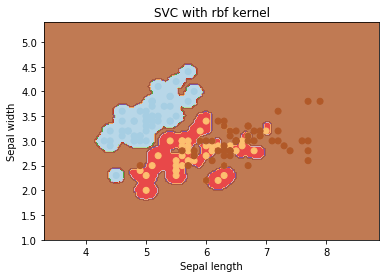

10-fold cv score:  0.64


In [8]:
svc_G100 = svm.SVC(kernel='rbf', gamma=100, C=1).fit(X, y)
graphPlot(svc_G100,"SVC with rbf kernel" )
crossval(svc_G100, X, y)

Increasing the value to 100 did not improve our model, which was expected. The model suffered a higher degree of overfitting, as it is possible to see on the graph, with the "blue" and "red" groups bordering their respective datapoints too closely, with the remaining space of the plot being attributed to the "brown" group once again. This confirms what we have discussed in the beggining of this section, and is equally pointed in the website: "Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem". The decrease in the cross-validation score was, therefore, expected, as any testing points that fall outside the decision boundaries closely flanking the data points of their respective category can be misclassified. For the brown dots, it appears that despite the high value of gamma (which should imply a very low distance of influence of each of the brown points, just like for the other two classes) new data that are far from any brown points will be classified as belonging to that very same class.

Therefore, when adjusting the gamma parameter in the RBF model it is particullarly important to take care as to not cause overfitting. In this particular example, we did not find underfitting to be a problem for a low value of gamma, so we cannot draw any conclusions, but caution should still be taken regarding this aspect when constructing the model.

### 1.2.2  C analysis

We also compared the difference between the suggested penalty parameter C of the error term, for missclassified points. If C is small, the penalty for misclassification of the training data is low, favoring a higher margin for the decision boundary. On the contrary, for large C values, the penalty for misclassification is higher, so the model will minimize the number of misclassifications, aiming to correctly classify the training data, leading to smaller margins. In other words, this parameter trades off the correct classification of examples versus maximization of the margins of the decision function. 

We will reproduce the plots of the website, just as we did for gamma, and interpret the influence of this parameter on the model. In order to provide the best results, we only changed the C values of each model, leaving the other ones with the default value.

### 1.2.2.1 C = 1

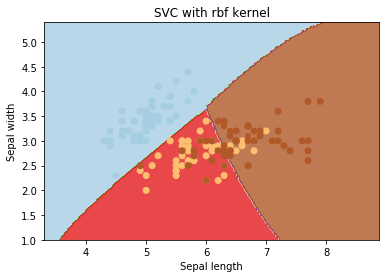

10-fold cv score:  0.827


In [9]:
svc_C1 = svm.SVC(kernel='rbf', C=1).fit(X, y)
graphPlot(svc_C1, "SVC with rbf kernel")
crossval(svc_C1, X, y)

The model presents simple borders for classification of the different classes, similar to the model with linear kernel, presented in the beggining. Misclassification is observed, but the model does not appear to significantly adjust the margins of the decision function to fit the misclassified data. Despite this, the model provides a good cross-validation score value, displaying a good prediction capability without causing overfitting.

### 1.2.2.2 C = 100

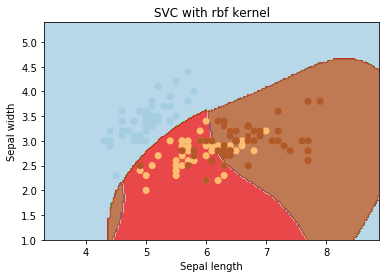

10-fold cv score:  0.807


In [10]:
svc_C100 = svm.SVC(kernel='rbf', C=100).fit(X, y)
graphPlot(svc_C100, "SVC with rbf kernel")
crossval(svc_C100, X, y)

Increasing the C value to 100 we start to observe the overfitting. The margins are decreased and adjusted to correcly classify more of the training data, at the expense of a poored prediction capability, as observed in the slight decrease in score.

### 1.2.2.3 C = 1000

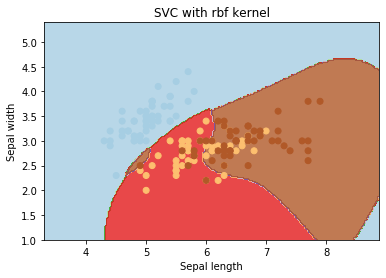

10-fold cv score:  0.78


In [11]:
svc_C10000 = svm.SVC(kernel='rbf', C=10000).fit(X, y)
graphPlot(svc_C10000, "SVC with rbf kernel")
crossval(svc_C10000, X, y)

When C is set a 1000 the overfitting becomes even more evident, with the model trying to correctly classify all the training data. We can observe the adjustment of the margins that delimit the brown area to include more of the brown dots, which caused the misclassification of some of the yellow dots. Furthermore we can observe a smaller brown area to the left to fit a single dot of this class. The score value continued to decrese, as expected.

Just like with gamma, we observed that increasing the C value resulted in increased overfitting. However, the model was not as sensitive to C as it was to gamma. Since gamma modulates the radius of influence of each data point, it appears to have the most impact on the decision boundaries. Furthermore, and given their respective roles in the model, for extremely high values of gamma misclassification of training data becomes extremely rare or even absent, meaning the C parameter will have little to no influence on such cases. Therefore, we can conclude that, while both parameters are important for the model and both can cause overfitting at high enough values, gamma is the most sensitive of the two. Nonetheless, both are important when constructing the model, and depending on the data in question these parameters can be increased to a model that fits better to the data, improving its predictive capabilities without causing overfitting.

## 2 Varying the degree of the polynomial kernel

The polynomial kernel is usefull when data is not easily separable in its current dimensionality space. This kernel increases the feature space of the data by using polynomials of the original variables, which can then be used to calculate data similarity and separate variables. For a degree <i>d</i> and the coefficient <i>r</i>, the polynomial kernel function between x<sub>1</sub> and x<sub>2</sub> is:

<center> <b>Poly(x<sub>1</sub>, x<sub>2</sub>) = (γ⟨x<sub>1</sub>, x<sub>2</sub>⟩ + r)<sup>d</sup></b></center>


With the C and gamma values tested, we set these values to 1 and 0.1 respectively and tested different degree values on the "poly" kernel model. We chose to tests degrees 1, 2, 3, 5, 7, and 10, as we concluded these would suffice to present our main conclusions.

In [12]:
svc_1 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=1).fit(X, y)
svc_2 = svm.SVC(kernel='poly', C=1, gamma=0.1,  degree=2).fit(X, y)
svc_3 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=3).fit(X, y)
svc_5 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=5).fit(X, y)
svc_7 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=7).fit(X, y)
svc_10 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=10).fit(X, y)

svc_lst = [svc_1,svc_2,svc_3,svc_5,svc_7,svc_10]

### 2.1 Degree = 1

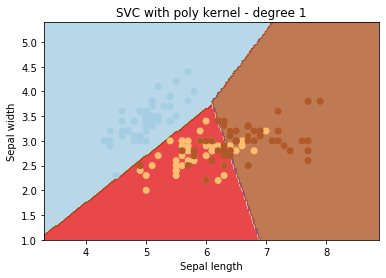

10-fold cv score:  0.8


In [13]:
svc_D1 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=1).fit(X, y)
graphPlot(svc_1, "SVC with poly kernel - degree 1")
crossval(svc_D1, X, y)

### 2.2 Degree = 2

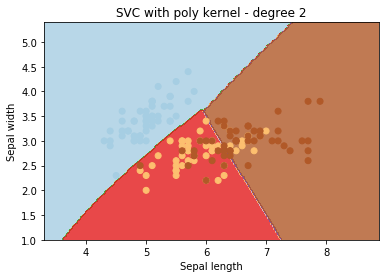

10-fold cv score:  0.813


In [14]:
svc_D2 = svm.SVC(kernel='poly', C=1, gamma=0.1,  degree=2).fit(X, y)
graphPlot(svc_2, "SVC with poly kernel - degree 2")
crossval(svc_D2, X, y)

### 2.3 Degree = 3

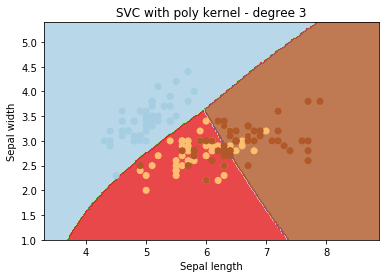

10-fold cv score:  0.807


In [15]:
svc_D3 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=3).fit(X, y)
graphPlot(svc_3, "SVC with poly kernel - degree 3")
crossval(svc_D3, X, y)

### 2.4 Degree = 5

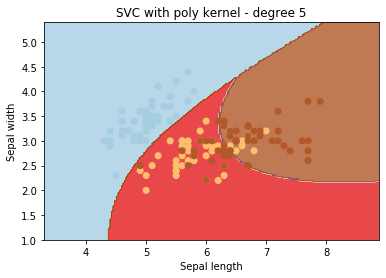

10-fold cv score:  0.793


In [16]:
svc_D5 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=5).fit(X, y)
graphPlot(svc_5, "SVC with poly kernel - degree 5")
crossval(svc_D5, X, y)

### 2.5 Degree = 7

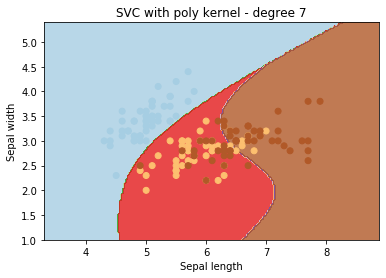

10-fold cv score:  0.773


In [17]:
svc_D7 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=7).fit(X, y)
graphPlot(svc_7, "SVC with poly kernel - degree 7")
crossval(svc_D7, X, y)

### 2.6 Degree = 10

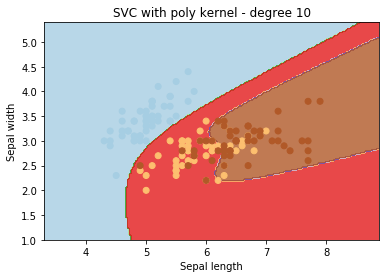

10-fold cv score:  0.78


In [18]:
svc_D10 = svm.SVC(kernel='poly', C=1, gamma=0.1, degree=10).fit(X, y)
graphPlot(svc_10, "SVC with poly kernel - degree 10")
crossval(svc_D10, X, y)

Observing the results of the polynomial kernel SVC for different degrees, we observe that for for degrees of 1, 2, and 3 both visual and score results do not change too much, although we can observe an increase of flexibility of the decision boundary. For higher degrees, the score decreases slighly, but the decision boundaries created by the model are much more flexible, as they try to separate the different classes in higher dimensions. We can observe that for degrees 5 and 10 a more "tight" fit of the decision boundary is created around the brown dots, altough in the intermediary degree of 7 this boundary does not exhibit the same pattern. As we are limited to visualizing data in three dimensions, the perception of data separation in degrees greather than 3 is not possible. Nonetheless, we can see that the higher the degree, the more flexible the decision boundaries become, as the model becomes more overfitted to the training data and produces slightly lower scores. 

For this reason, we do not consider higher degrees of the polynomial kernel to be usefull for this dataset. This parameter should be adjusted when data is not easily separable in lower dimensions, but when separation does not appear to improve in higher degrees (such as in this case, where brown an yellow data are overlapped), increasing the degree further is not beneficial to the model, and can even decrease its accuracy.

## 3 Practice Problem

For the practice problem presented in the website we needed to recreate the dataset that originated the displayed plot, create an additional feature that would allow class separation in a higher dimensional space using a hyperplane, and visualize that separation.

### 3.1 Creating the dataset

To generate a dataset similar to the one presented in the website, we superimposed a grid on top of the plot, using an image edition software, and estimated the coordinates of each datapoint, assigning them to two different dataframes according to their original class (blues starts or red dots). For simplicity, we used dots to represent both classes and maintained their original blue and red colors.

In [19]:
blue_df = pd.DataFrame({'x': [-4, -3.3, -2.3, -1.8, -1.3, -0.8, 0.8, 1.2, 1.2, 1.8, 2.8, 3.8], 
                        'y': [5, 6.5, 4.5, 9.5, 6.8, 4, 7.8, 9.5, 6, 4, 7.5, 6]})

red_df = pd.DataFrame({'x': [-7.5, -6.5, -5.5, -3.5, -2.2, -1.2, 1.5, 3.5, 4.8, 5.8, 6.5, 6.8], 
                       'y': [6, 4.2, 2.8, 1.8, 1.5, 1, 1, 1.2, 2.2, 3.5, 8, 5.2 ]})

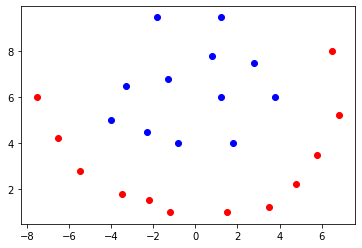

In [20]:
plt.scatter(blue_df['x'], blue_df['y'], c='blue')
plt.scatter(red_df['x'], red_df['y'], c='red')
plt.show()

### 3.2 Additional feature


Our goal with this exercise is to find a new feature that allows the separation of the data using a hyperplane in a higher dimensional space. For that end, we noticed that by applying the equation presented in the website for the squared radius of the circle (__z = x<sup>2</sup> + y<sup>2</sup>__) we could create a new variable <i>z</i> that would allow three-dimensional separation of the blue and red classes.

In [21]:
#finding the additional feature z to have a hyper-plane for segregating the classes
blue_df['z'] = blue_df['x']**2 + blue_df['y']**2
red_df['z'] = red_df['x']**2 + red_df['y']**2

### 3.3 Visualizing group separation

We started by plotting the three features in a 3-dimensional plot to see if we could observe a possible separation of the two different classes using a hyperplane.

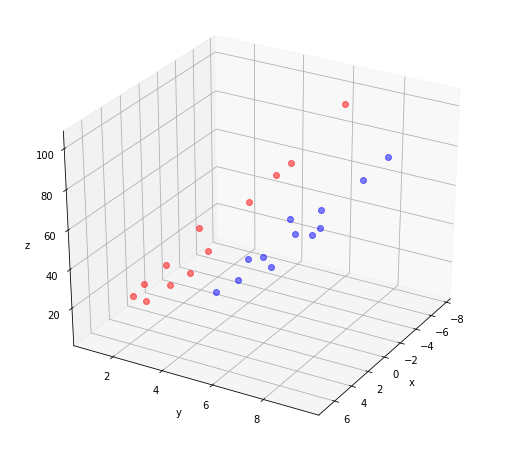

In [22]:
fig = plt.figure(figsize=(9,8))

ax = fig.add_subplot(111, projection='3d')

plt.plot(blue_df['x'], blue_df['y'], blue_df['z'],'ob', c='b', alpha=0.5)
plt.plot(red_df['x'], red_df['y'], red_df['z'],'ob',c = 'r',alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(30, 30)
plt.show()

As we can observe, class separation using a hyperplane is now possible. However, we were also interested to see if the projection of the data points in 2D would show this separation as well. For that we will assess the combination of axes x and z, as well as y and z, since we already now that x and y do not result in  group separation using a hyperplane.

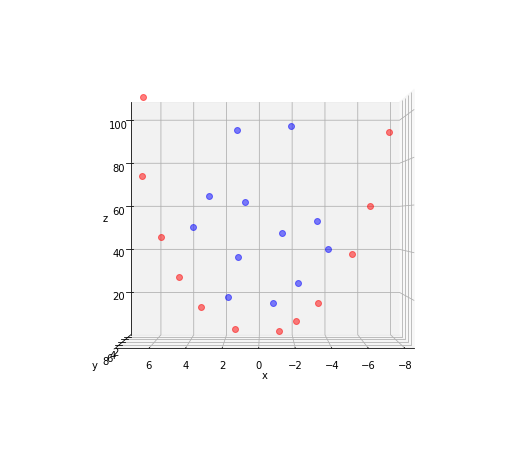

In [23]:
fig = plt.figure(figsize=(9,8))

ax = fig.add_subplot(111, projection='3d')

plt.plot(blue_df['x'], blue_df['y'], blue_df['z'],'ob', c='b', alpha=0.5)
plt.plot(red_df['x'], red_df['y'], red_df['z'],'ob',c = 'r',alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#x and z
ax.view_init(0,90)
plt.show()

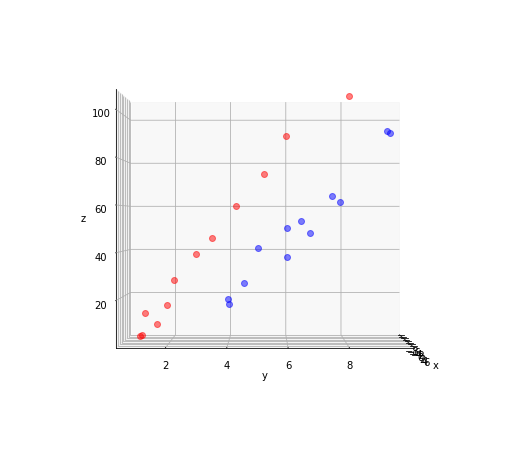

In [24]:
fig = plt.figure(figsize=(9,8))

ax = fig.add_subplot(111, projection='3d')

plt.plot(blue_df['x'], blue_df['y'], blue_df['z'],'ob', c='b', alpha=0.5)
plt.plot(red_df['x'], red_df['y'], red_df['z'],'ob',c = 'r',alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#y and z
ax.view_init(0,0)
plt.show()

The first combination of axes does not enable separation of the two classes using a hyperplane, but the second combination does. Since data projection on the y and z axes displays class separation, we will use a 2D plot with these dimensions to represent the hyperplane between the two classes, here represented by a dashed line:

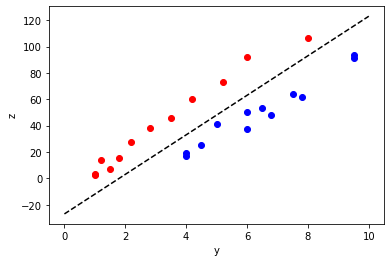

In [25]:
#plotting the line
y2 = np.linspace(0,10,50)
z2 = 15*y2 - 27
plt.plot(y2, z2, 'k--')

#plotting the data
plt.scatter(blue_df['y'], blue_df['z'], c='blue')
plt.scatter(red_df['y'], red_df['z'], c='red')

plt.xlabel('y')
plt.ylabel('z')
plt.show()

The strategy we employed for class separation using an additional feature serves as a visualization of the underlying procedure performed by the SVC kernel when it increases dimensionality of the data to enable separation. It is important to know that these kernels don't necessarily generate the new feature values, rather they compute the distances based on the expressions used to calculate them, and then calculate the separation boundaries based on the support vectors for those dimensions.